In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import quandl
import GPy

## source1: quandl (used here)

In [3]:
df_bcoin_usd = quandl.get("BCHARTS/WEXUSD")

In [4]:
df_bcoin_usd.shape

(26, 7)

In [5]:
df_bcoin_usd.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2017-09-19,4280.000,4375.000,4240,4288.304,429.578652,1854118.88453,4316.133676
2017-09-20,4277.128,4415.000,4230,4310.000,618.505823,2682597.57433,4337.222828
2017-09-21,4310.000,4368.770,3925,4038.590,1329.859903,5512970.17943,4145.527033
2017-09-22,4031.686,4159.000,3949,4057.986,630.515884,2551071.55487,4046.006804
2017-09-23,4033.877,4234.181,4000,4222.001,492.037507,2049765.83133,4165.873135


## utils function

In [22]:
def plot_2outputs(m,xlim,ylim,X1,Y1,X2,Y2):
    fig = plt.figure(figsize=(12,12))
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,100),ax=ax1)
    ax1.plot(X1,Y1,'rx',mew=1.5)
    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_title('Output 2')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(100,200),ax=ax2)
    ax2.plot(X2,Y2,'rx',mew=1.5)

In [7]:
# def plot_2outputs(m,xlim,ylim):
#     fig = plt.figure(figsize=(12,8))
#     #Output 1
#     ax1 = fig.add_subplot(211)
#     ax1.set_xlim(xlim)
#     ax1.set_title('Output 1')
#     m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,100),ax=ax1)
#     ax1.plot(Xt1[:,:1],Yt1,'rx',mew=1.5)
#     #Output 2
#     ax2 = fig.add_subplot(212)
#     ax2.set_xlim(xlim)
#     ax2.set_title('Output 2')
#     m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(100,200),ax=ax2)
#     ax2.plot(Xt2[:,:1],Yt2,'rx',mew=1.5)

## source 2 (historical)

In [8]:
demo_data = pd.read_csv('1coinUSD.csv',header=None)

In [9]:
demo_data.shape

(764732, 3)

In [10]:
demo_data.head()

,0,1,2
0,1394351059,621.0,0.01
1,1394351073,620.0,0.01
2,1394427477,620.0,0.01
3,1394427596,620.5,0.01
4,1394427614,621.0,0.01


In [11]:
demo_data.columns = ['timestamp','price','volume']

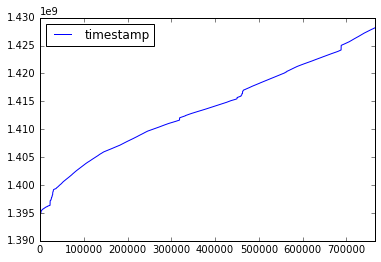

In [12]:
demo_data.iloc[:,0:1].plot()

## continue exploration

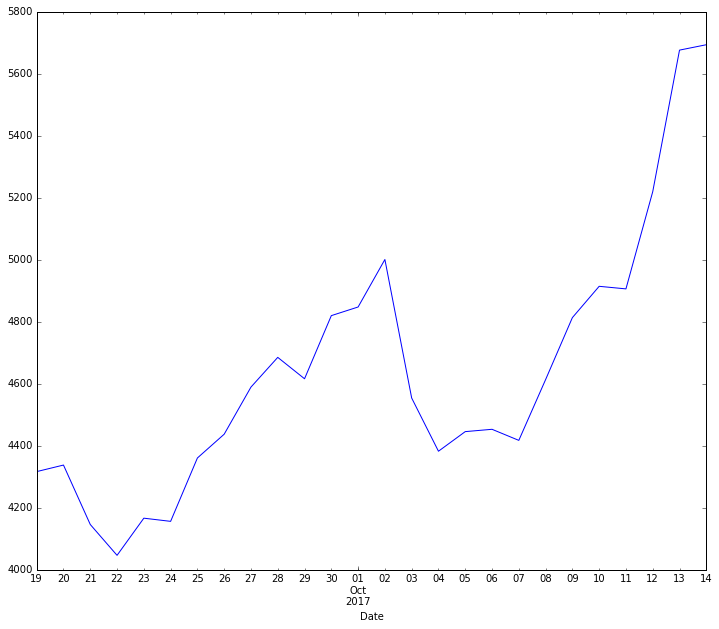

In [13]:
plt.figure(figsize=(12,10))
df_bcoin_usd['Weighted Price'].plot()

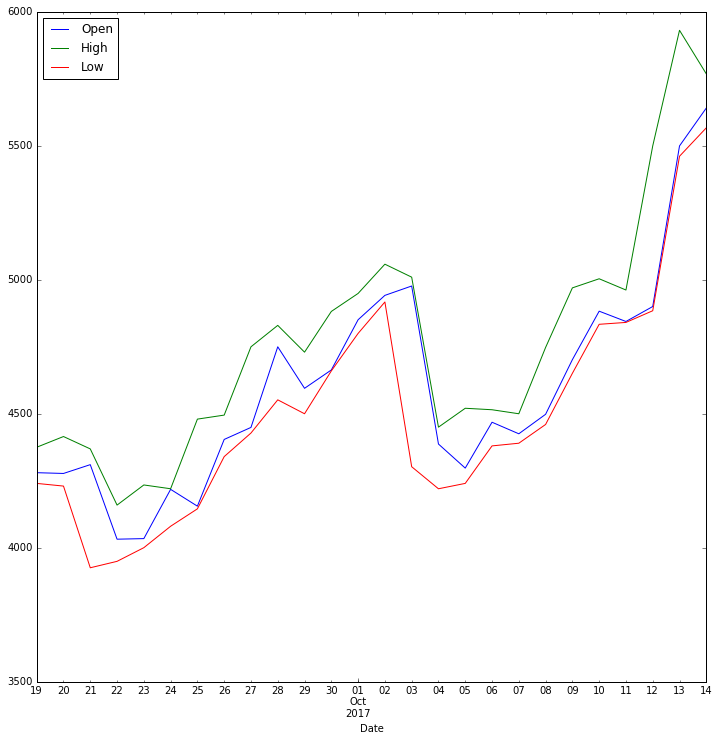

In [14]:
df_bcoin_usd.iloc[:,0:3].plot(figsize=(12,12))

In [15]:
df_bcoin_usd.index.dayofyear


array([262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287], dtype=int32)

In [16]:
X1 = df_bcoin_usd.index.dayofyear
X2 = df_bcoin_usd.index.dayofyear
X3 = df_bcoin_usd.index.dayofyear
Y1 = df_bcoin_usd.Low.values
Y2 = df_bcoin_usd.High.values
Y3 = df_bcoin_usd.Open.values

In [17]:
print(X1.shape, X2.shape, Y1.shape, Y2.shape)

(26,) (26,) (26,) (26,)


In [33]:
K = GPy.kern.Matern32(1)
icm = GPy.util.multioutput.ICM(input_dim=1,num_outputs=3,kernel=K)

m = GPy.models.GPCoregionalizedRegression([X1[:,None],X2[:,None],X3[:,None]],[Y1[:,None],Y2[:,None],Y3[:,None]],kernel=icm)
m['.*Mat32.var'].constrain_fixed(1.) #For this kernel, B.kappa encodes the variance now.
m.optimize()
print(m)


Name : gp
Objective : 503.158697684544
Number of Parameters : 11
Number of Optimization Parameters : 10
Updates : True
Parameters:
  gp.                                    |          value  |  constraints  |  priors
  ICM.Mat32.variance                     |            1.0  |   fixed +ve   |        
  ICM.Mat32.lengthscale                  |  21.5106581392  |      +ve      |        
  ICM.B.W                                |         (3, 1)  |               |        
  ICM.B.kappa                            |           (3,)  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |  9363.21623986  |      +ve      |        
  mixed_noise.Gaussian_noise_1.variance  |  9375.59338724  |      +ve      |        
  mixed_noise.Gaussian_noise_2.variance  |  10024.7782353  |      +ve      |        


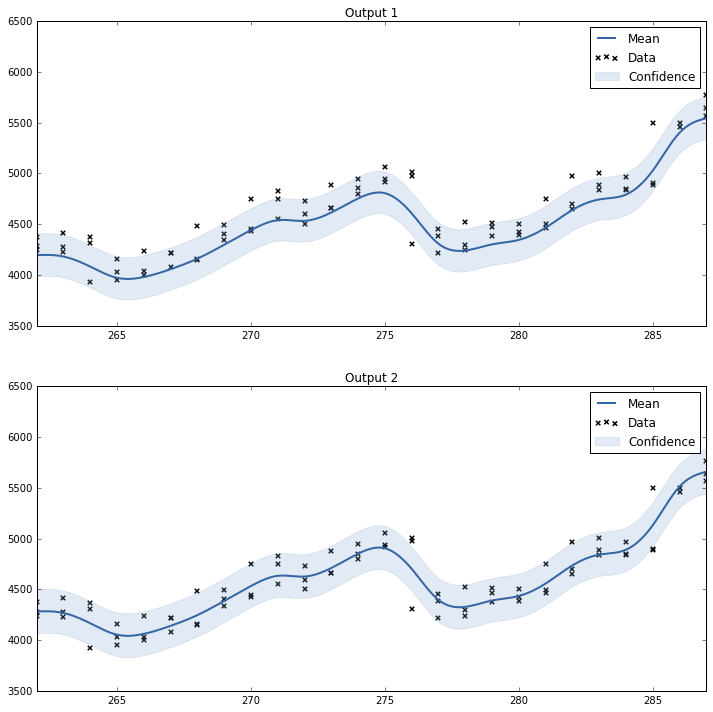

In [34]:
fig = plt.figure(figsize=(12,12))
#Output 1
ax1 = fig.add_subplot(211)
xlim = (X1.min(),X1.max())
ax1.set_xlim(xlim)
ax1.set_title('Output 1')
m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],ax=ax1)
ax2 = fig.add_subplot(212)
xlim = (X1.min(),X1.max())
ax2.set_xlim(xlim)
ax2.set_title('Output 2')
m.plot(plot_limits=xlim,fixed_inputs=[(1,2)],ax=ax2)

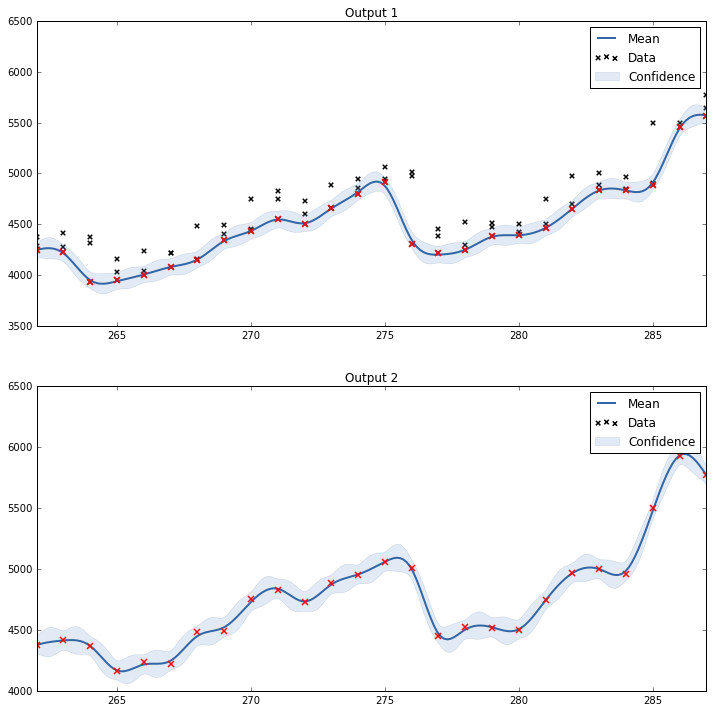

In [24]:
plot_2outputs(m,xlim=(X1.min(),X1.max()),ylim=(3500,6000),X1=X1,Y1=Y1,X2=X2,Y2=Y2)